In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns
import matplotlib.ticker as tick

## Learning Curves

In [3]:
hist_dict = {'adv_history': pd.read_csv('Advection/Trained_models/Advection_PINTO/history.csv'),
'be_history' : pd.read_csv('Burgers/Trained_models/Burgers_PINTO/history.csv'),
'bel_history': pd.read_csv('Beltrami/Trained_models/Beltrami_PINTO/history.csv'),
'kf_history': pd.read_csv('Kovasznay/Trained_models/KF_PINTO/history.csv'),
'lid_history': pd.read_csv('Lid-Driven/Trained_models/LDF_PINTO/history.csv').iloc[:40000],
'pid_adv_history': pd.read_csv('Advection/Trained_models/Advection_DeepONet/history.csv'),
'pid_be_history': pd.read_csv('Burgers/Trained_models/Burger_DeepONet/history.csv'),
'pid_bel_history': pd.read_csv('Beltrami/Trained_models/Beltrami_DeepONet/history.csv'),
'pid_kf_history': pd.read_csv('Kovasznay/Trained_models/KF_DeepONet/history.csv'),
'pid_lid_history': pd.read_csv('Lid-Driven/Trained_models/LDF_DeepONet/history.csv').iloc[:40000]}

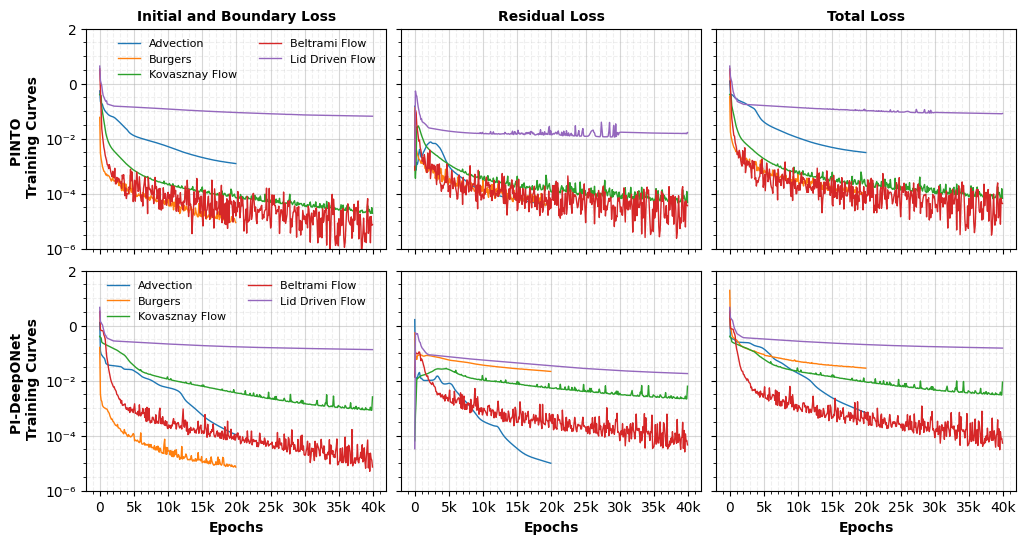

In [5]:
pdir = 'PI_DeepONets_Advection_training_testing_plots'
pt = ['Initial Value', 'TNO Solutions', 'Numerical Solutions']

grid_spec = {'wspace': 0.05, 'hspace': 0.1, 'width_ratios':[1, 1, 1], 'height_ratios':[1, 1]}
fig, ax = plt.subplots(2, 3, figsize=(12, 6), sharex='col', sharey='row', 
                           gridspec_kw =grid_spec)
lk = ['bound_loss', 'residual_loss', 'loss']
labels = ['Advection', 'Burgers', 'Kovasznay Flow', 'Beltrami Flow', 'Lid Driven Flow']
title = ['Initial and Boundary Loss', 'Residual Loss', 'Total Loss']
steps = 100
tick_labels = [0, 5, 10, 15, 20, 25, 30, 35, 40]

for n, i in enumerate(list(hist_dict.keys())[:5]):
    for j, k in enumerate(lk):
        ax[0][j].plot(range(1, len(hist_dict[i])+1)[::steps], np.log10(hist_dict[i][k])[::steps], linewidth=1., label=labels[n])
        if j==0:
            ax[0][j].legend(fancybox=False, frameon=False, ncols=2, fontsize=8, 
                            title_fontproperties={'weight':'bold'}, loc='upper right')
        ax[0][j].minorticks_on()
        ax[0][j].grid(True, which='major', linestyle='-', alpha=0.5)
        ax[0][j].grid(True, which='minor', linestyle='--', alpha=0.2)
        ax[0][j].set_ylim([-6, 2])
        ax[0][j].set_title(title[j], fontsize=10, fontweight='bold')
        ax[0][j].set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])
        ax[0][j].set_xticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k'])
        ax[0][j].set_yticks([-6, -4, -2, 0, 2])
        ax[0][j].set_yticklabels(['10⁻⁶', '10⁻⁴', '10⁻²', '0', '2'])


for n, i in enumerate(list(hist_dict.keys())[5:]):
    for j, k in enumerate(lk):
        ax[1][j].plot(range(1, len(hist_dict[i])+1)[::steps], np.log10(hist_dict[i][k])[::steps], linewidth=1., label=labels[n])
        if j==0:
            ax[1][j].legend(fancybox=False, frameon=False, ncols=2, fontsize=8, 
                            title_fontproperties={'weight':'bold'}, loc='upper center')
        ax[1][j].minorticks_on()
        ax[1][j].grid(True, which='major', linestyle='-', alpha=0.5)
        ax[1][j].grid(True, which='minor', linestyle='--', alpha=0.2)
        ax[1][j].set_ylim([-6, 2])
        ax[1][j].set_xlabel('Epochs', fontsize=10, fontweight='bold')
        ax[1][j].set_xticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000])
        ax[1][j].set_xticklabels(['0', '5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k'])
        ax[1][j].set_yticks([-6, -4, -2, 0, 2])
        ax[1][j].set_yticklabels(['10⁻⁶', '10⁻⁴', '10⁻²', '0', '2'])

ax[0][0].set_ylabel('PINTO \n Training Curves', fontsize=10, fontweight='bold')
ax[1][0].set_ylabel('PI-DeepONet \n Training Curves', fontsize=10, fontweight='bold')

plt.savefig('Figure-B11', dpi=300, bbox_inches = 'tight', format='png')